<center><h1>MGIS650 Introduction to Data Analytics and Business Intelligence</h1></center>
<center><h3>Project 03 by Sreenidhi Sridhar</h3></center>


<center><h2>News Article Popularity Prediction</h2></center>
<p><B>Description:</B> This is a binary classification problem where the popularity of the article is based on number of shares. The dataset is consisted of 39,643 news articles from an online news website called Mashable collected over 2 years from Jan2013 to Jan2015.</p>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd

#pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#feature selection
from sklearn.feature_selection import RFECV

#results
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score

#confusion matrix
from sklearn.metrics import confusion_matrix

#plotting
import seaborn as sns

#GridSearch
from sklearn.metrics import make_scorer 
from sklearn.model_selection import GridSearchCV

<b>Step-1:</b> Loading the dataset!

In [2]:
# Load the online news dataset
df = pd.read_csv("OnlineNewsPopularity.csv")
display(df.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#statistics of original target attribute
popularity_orig = df[df.keys()[-1]]
popularity_orig.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

<b>Step-2:</b> Pre-processing the data.
<ul><li>Label Encoding</li><li>Drop unnecessary attributes</li><li>Normalizing</li></ul>

In [4]:
# Encode the label by threshold 1400 (50%)
label_encoder = preprocessing.LabelEncoder()
popularity_encod = pd.Series(label_encoder.fit_transform(popularity_orig>=1400))

In [5]:
# Get the features from dataset and eliminating first two attributes because they are not required to determine popularity.
#Also, the last variable because it is the target variable.
features_orig = df.drop(['url',df.keys()[1],df.keys()[-1]], axis=1)
display(features_orig.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [6]:
# Normalize the numerical features
scaler = MinMaxScaler()
numerical_var = [' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos',\
            ' average_token_length',' num_keywords',' self_reference_min_shares',' self_reference_max_shares',\
             ' self_reference_avg_sharess']
features_orig[numerical_var] = scaler.fit_transform(df[numerical_var])
display(features_orig.head(n = 3))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875
1,0.333333,0.030092,0.604743,1.0,0.791946,0.009868,0.008621,0.007812,0.0,0.611043,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000
2,0.333333,0.024900,0.575130,1.0,0.663866,0.009868,0.008621,0.007812,0.0,0.546334,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000


<b>Step-3:</b> Feature Selection
<p><B>Description:</B> Feature selection using RFECV for each model which is the short form of Recursive feature elimination with cross-validation to select the number of features.</p>

In [7]:
# Feature selection by RFECV for Logistic Regression
estimator_LR = LogisticRegression(random_state=0,max_iter=500)
selector_LR = RFECV(estimator_LR, step=1, cv=5)
selector_LR = selector_LR.fit(features_orig, popularity_encod)
display("Number of features selected for Logistic Regression: ")
print(features_orig.columns.values[selector_LR.ranking_==1].shape[0])
display("Selected Features for Logistic Regression are: ")
print(features_orig.columns.values[selector_LR.ranking_==1])
feature_selec_LR = features_orig[features_orig.columns.values[selector_LR.ranking_==1]]

'Number of features selected for Logistic Regression: '

5


'Selected Features for Logistic Regression are: '

[' data_channel_is_entertainment' ' data_channel_is_tech'
 ' data_channel_is_world' ' is_weekend' ' LDA_02']


In [8]:
# Feature selection by RFECV for RandomForest Classifier
estimator_RF = RandomForestClassifier(random_state=0)
selector_RF = RFECV(estimator_RF, step=1, cv=5)
selector_RF = selector_RF.fit(features_orig, popularity_encod)
display("Number of features selected for randomforest Classifier: ")
print (features_orig.columns.values[selector_RF.ranking_!=1].shape[0])
display("Selected Features for randomforest Classifier are: ")
print (features_orig.columns.values[selector_RF.ranking_!=1])
feature_selec_RF = features_orig[features_orig.columns.values[selector_RF.ranking_==1]]

'Number of features selected for randomforest Classifier: '

20


'Selected Features for randomforest Classifier are: '

[' n_non_stop_words' ' num_videos' ' num_keywords'
 ' data_channel_is_lifestyle' ' data_channel_is_entertainment'
 ' data_channel_is_bus' ' data_channel_is_socmed' ' data_channel_is_tech'
 ' data_channel_is_world' ' kw_min_min' ' kw_max_max' ' weekday_is_monday'
 ' weekday_is_tuesday' ' weekday_is_wednesday' ' weekday_is_thursday'
 ' weekday_is_friday' ' weekday_is_saturday' ' weekday_is_sunday'
 ' max_positive_polarity' ' abs_title_sentiment_polarity']


<b>Step-4:</b> Split the dataset 
<p><B>Description:</B> Here the dataset is divided into two equal halves for both the models</p>

In [9]:
# Split data into training and testing sets
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(feature_selec_LR, popularity_encod, test_size = 0.5, random_state = 0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(feature_selec_RF, popularity_encod, test_size = 0.5, random_state = 0)

print("Logistic Regression")
print ("Training set has {} samples.".format(X_train_LR.shape[0]))
print ("Testing set has {} samples.".format(X_test_LR.shape[0]))
print("Random Forest Classifier")
print ("Training set has {} samples.".format(X_train_RF.shape[0]))
print ("Testing set has {} samples.".format(X_test_RF.shape[0]))

Logistic Regression
Training set has 19822 samples.
Testing set has 19822 samples.
Random Forest Classifier
Training set has 19822 samples.
Testing set has 19822 samples.


<b>Step-5:</b> Modelling
<p><B>Description:</B> Logistic Regression and Random Forest classifier is used with random parameters</p>

In [10]:
#Logistic Regression
clf_LR = LogisticRegression(random_state=0,C=1.0,max_iter=500)
size = X_train_LR.shape[0]
clf_LR.fit(X_train_LR[:size], y_train_LR[:size])
predictions_test_LR = clf_LR.predict(X_test_LR)

#Random Forest Classifier
clf_RF = RandomForestClassifier(random_state=0)
size = X_train_RF.shape[0]
clf_RF.fit(X_train_RF[:size], y_train_RF[:size])
predictions_test_RF = clf_RF.predict(X_test_RF)

In [11]:
#RESULTS FOR LOGISTIC REGRESSION MODEL
display("RESULTS FOR LOGISTIC REGRESSION:")
print("Accuracy:")
print(accuracy_score(y_test_LR,predictions_test_LR))
print("F-score:")
print(fbeta_score(y_test_LR,predictions_test_LR,beta=1))
print("AUC:")
print(roc_auc_score(y_test_LR,predictions_test_LR))

#RESULTS FOR RANDOM FOREST CLASSIFIER
display("RESULTS FOR RANDOM FOREST CLASSIFIER:")
print("Accuracy:")
print(accuracy_score(y_test_RF,predictions_test_RF))
print("F-score:")
print(fbeta_score(y_test_RF,predictions_test_RF,beta=1))
print("AUC:")
print(roc_auc_score(y_test_RF,predictions_test_RF))

'RESULTS FOR LOGISTIC REGRESSION:'

Accuracy:
0.6180002017959842
F-score:
0.6792884371029224
AUC:
0.6078593791606893


'RESULTS FOR RANDOM FOREST CLASSIFIER:'

Accuracy:
0.6547270709312885
F-score:
0.6886543535620053
AUC:
0.6503325391241134


<b>Step-6:</b> Improve the model
<p><B>Description:</B> Grid Search is used to improve the model performance by selecting the suitable parameters for each model(Hyper-parameter Tuning).</p>

In [12]:
# Function to perform GridSearch and print the desired parameters
def gridsearch(clf,parameters,X_train, y_train, X_test, y_test):
    scorer = make_scorer(roc_auc_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data to find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)
    best_clf = grid_fit.best_estimator_

# Make predictions the model with test data
    best_predictions = best_clf.predict(X_test)

    print (clf.__class__.__name__)
    print ("\nOptimized Model\n------")
    print ("Accuracy score: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print ("F-score: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=1)))
    print ("AUC: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
    
# Best model
    print (best_clf)

In [13]:
# parameters for GridSearch 
parameters_RF = {"n_estimators": [10,20,50,100,250,500]}
parameters_LR = {"penalty": ['l2'],"C": [0.1,0.5,1.0,2.0,2.5,5.0]}

In [15]:
# Function call
# Grid search for logistic regression
gridsearch(clf_LR,parameters_LR,X_train_LR, y_train_LR, X_test_LR, y_test_LR)
print("\n")
# Grid search for RF
gridsearch(clf_RF,parameters_RF,X_train_RF, y_train_RF, X_test_RF, y_test_RF)

LogisticRegression

Optimized Model
------
Accuracy score: 0.6180
F-score: 0.6793
AUC: 0.6079
LogisticRegression(C=0.5, max_iter=500, random_state=0)


RandomForestClassifier

Optimized Model
------
Accuracy score: 0.6613
F-score: 0.6964
AUC: 0.6565
RandomForestClassifier(n_estimators=500, random_state=0)


In [16]:
# Best Model

# Logistic Regression
clf_LR = LogisticRegression(C=0.5, max_iter=500, random_state=0)
size = X_train_LR.shape[0]
clf_LR.fit(X_train_LR[:size], y_train_LR[:size])
predictions_test_LR = clf_LR.predict(X_test_LR)

# Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators=500, random_state=0)
size = X_train_RF.shape[0]
clf_RF.fit(X_train_RF[:size], y_train_RF[:size])
predictions_test_RF = clf_RF.predict(X_test_RF)

In [17]:
# Results for the best model
# LOGISTIC REGRESSION
display("RESULTS FOR LOGISTIC REGRESSION:")
print("Accuracy:")
print(accuracy_score(y_test_LR,predictions_test_LR))
print("F-score:")
print(fbeta_score(y_test_LR,predictions_test_LR,beta=1))
print("AUC:")
print(roc_auc_score(y_test_LR,predictions_test_LR))

# RANDOM FOREST CLASSIFIER
display("RESULTS FOR RANDOM FOREST CLASSIFIER:")
print("Accuracy:")
print(accuracy_score(y_test_RF,predictions_test_RF))
print("F-score:")
print(fbeta_score(y_test_RF,predictions_test_RF,beta=1))
print("AUC:")
print(roc_auc_score(y_test_RF,predictions_test_RF))

'RESULTS FOR LOGISTIC REGRESSION:'

Accuracy:
0.6180002017959842
F-score:
0.6792884371029224
AUC:
0.6078593791606893


'RESULTS FOR RANDOM FOREST CLASSIFIER:'

Accuracy:
0.6612854404197357
F-score:
0.6963914262458171
AUC:
0.6564687736032865


<h3>Confusion Matrix for the best model</h3>

<AxesSubplot:>

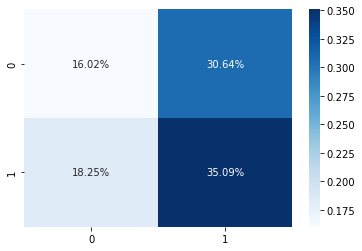

In [18]:
# Logistic Regression
cf_matrix = confusion_matrix(y_train_LR, predictions_test_LR)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

<AxesSubplot:>

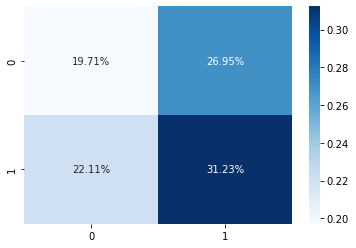

In [19]:
# Random Forest Classifier
cf_matrix = confusion_matrix(y_train_RF, predictions_test_RF)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

<h3>Conclusion:</h3> <p>Sklearn is used to implement the classification algorithms Logistic Regression and Random Forest. The model's hyperparameters are then fine-tuned using the grid search method. Three metrics are used to evaluate and compare the refined models (accuracy, F1-score, AUC). The Random Forest model with refined hyperparameters should be used in a general setting to solve these types of problems because it achieves a fairly good performance.</p>